# HK Model with Separable Landau Interaction

#### Imports

In [1]:
from HKLnumerics import HKLseparable_1D, PhaseDiagram_1D, PlotFunctions
import numpy as np

### Single Plot

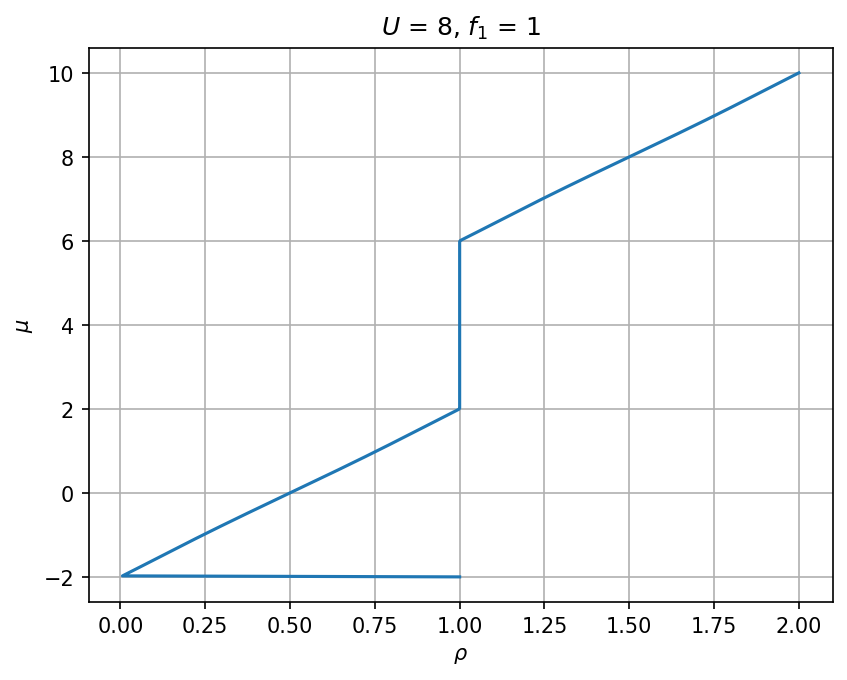

In [2]:
U = 8
f_1 = 1

f_1_str = r'$f_1$'
U_str = r'$U$'

mu_array = HKLseparable_1D.create_mu_array(500, U, 0)

rho_array_sing_plot, e_array_sing_plot = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_array, U, 0, f_1)
PlotFunctions.one_plot(rho_array_sing_plot, mu_array, r'$\rho$', r'$\mu$', f'{U_str} = {U}, {f_1_str} = {f_1}')

### $U = const.$, Investigate effect of $f_1$

In [3]:
U = 6

mu_array = HKLseparable_1D.create_mu_array(500, U, 0)

rho_array_05, e_array_05 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_array, U, 0, 5)
rho_array_02, e_array_02 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_array, U, 0, 2)
rho_array_08, e_array_08 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_array, U, 0, 8)
rho_array_01, e_array_01 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_array, U, 0, 1.0)
rho_array, e_array = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_array, U, 0, 0)

rhos = [rho_array, rho_array_01, rho_array_02, rho_array_05, rho_array_08]
for rho_i in rhos:
    rho_i[0] = 0
mus = [mu_array, mu_array, mu_array, mu_array, mu_array]
labels = [r'$f_1 = 0$', r'$f_1 = 1$', r'$f_1 = 2$', r'$f_1 = 5$', r'$f_1 = 8$']

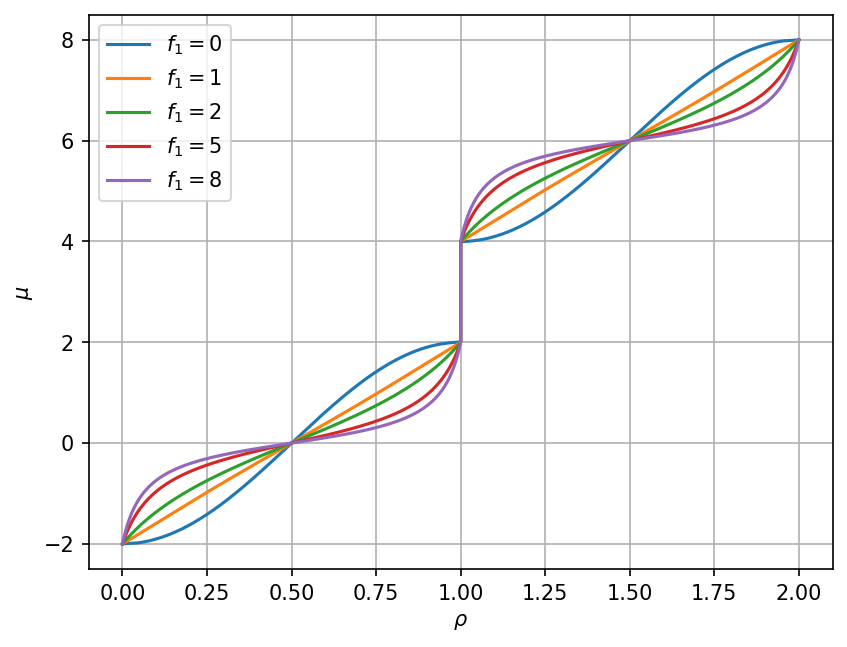

In [4]:
PlotFunctions.many_plots(labels, rhos, mus, r'$\rho$', r'$\mu$')

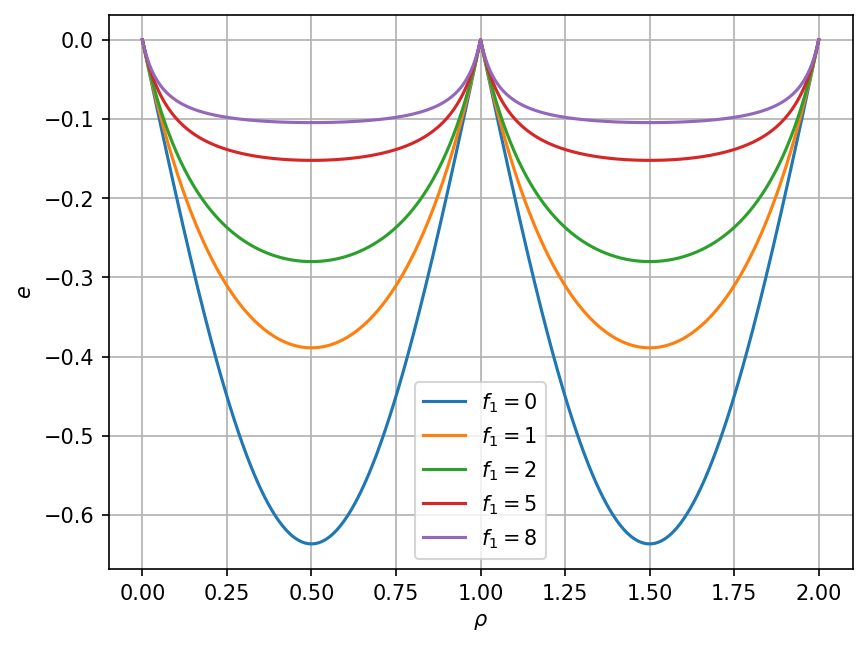

In [5]:
es = [e_array, e_array_01, e_array_02, e_array_05, e_array_08]
PlotFunctions.many_plots(labels, rhos, es, r'$\rho$', r'$e$')

### $f_1 = const$, investigate how different $U$ are affected

In [6]:
f_1 = 2

U_vals = [1, 2, 6, 8]

mu_U1 = HKLseparable_1D.create_mu_array(500, U_vals[0], 0)
mu_U2 = HKLseparable_1D.create_mu_array(500, U_vals[1], 0)
mu_U3 = HKLseparable_1D.create_mu_array(500, U_vals[2], 0)
mu_U4 = HKLseparable_1D.create_mu_array(500, U_vals[3], 0)

rho_U1, e_U1 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_U1, U_vals[0], 0, f_1)
rho_U2, e_U2 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_U2, U_vals[1], 0, f_1)
rho_U3, e_U3 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_U3, U_vals[2], 0, f_1)
rho_U4, e_U4 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_U4, U_vals[3], 0, f_1)

rhos_U = [rho_U1, rho_U2, rho_U3, rho_U4]
es_U = [e_U1, e_U2, e_U3, e_U4]
mus_U = [mu_U1, mu_U2, mu_U3, mu_U4]
labels_U = [f'U={U_vals[0]}', f'U={U_vals[1]}', f'U={U_vals[2]}', f'U={U_vals[3]}']

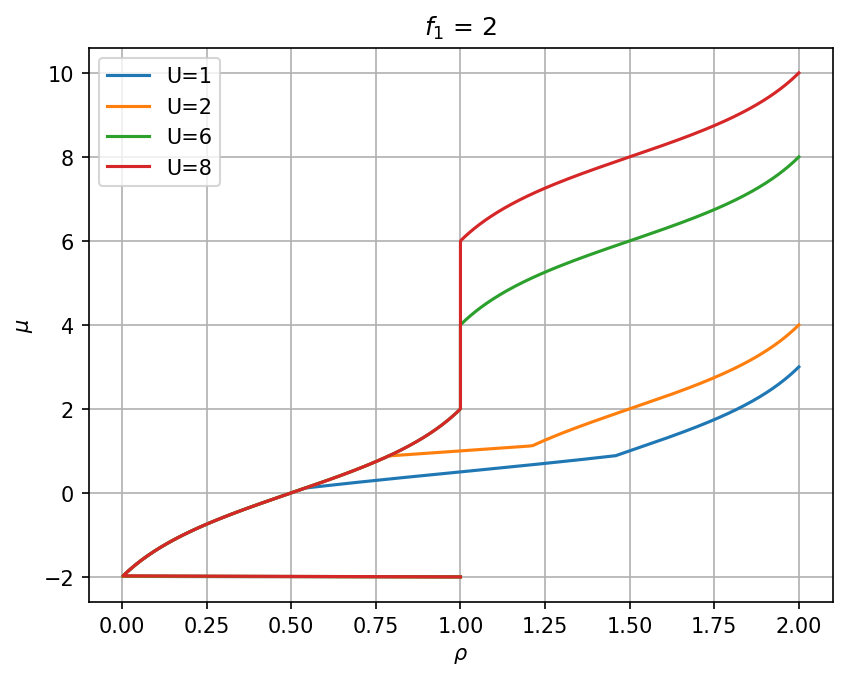

In [7]:
PlotFunctions.many_plots(labels_U, rhos_U, mus_U, r'$\rho$', r'$\mu$', title=f'{f_1_str} = {f_1}')

## Phase Diagram

In [8]:
Uc_arr_01, rho_arr_01 = PhaseDiagram_1D.phase_diagram_landau(500, 1)

Uc_arr_02, rho_arr_02 = PhaseDiagram_1D.phase_diagram_landau(500, 2)

Uc_arr_03, rho_arr_03 = PhaseDiagram_1D.phase_diagram_landau(500, 3)

Uc_arr_00, rho_arr_00= PhaseDiagram_1D.phase_diagram_landau(500, 0)


Ucs = [Uc_arr_00, Uc_arr_01, Uc_arr_03, Uc_arr_02]
pd_rhos = [rho_arr_00 - 1, rho_arr_01, rho_arr_03, rho_arr_02]
pd_labels = [r'$f_1 = 0$', r'$f_1 = 1$', r'$f_1 = 3$', r'$f_1 = 2$']

Progress: 99.8%                    

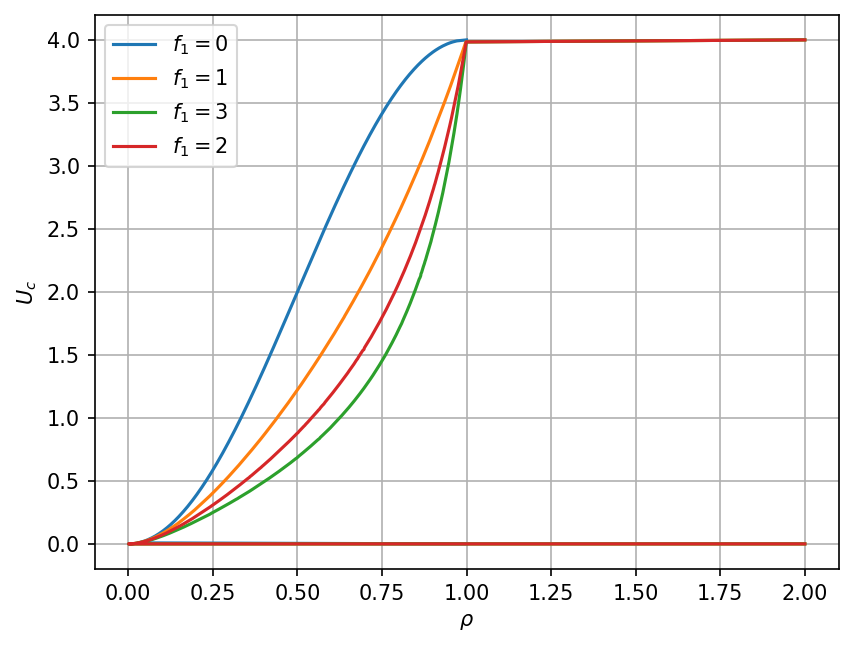

In [9]:
PlotFunctions.many_plots(pd_labels, pd_rhos, Ucs, r'$\rho$', r'$U_c$')